In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")

from gob.benchmarks import *
from gob.optimizers import *
import matplotlib
matplotlib.rcParams.update({"text.usetex": True})

In [4]:
class VisualWrapper:
  def __init__(self, func):
    self.func = func
    self.visual_bounds = func.visual_bounds
    self.samples = []
    self.values = []
    self.prev_sample = None
  
  def __call__(self, x):
    y = self.func(x)
    if self.prev_sample is None or not np.all(np.abs(x - self.prev_sample) <= 2e-9):
      self.samples.append(x)
      self.values.append(y)
    self.prev_sample = x
    return y

  def visualize(self):
    x_min, x_max = self.visual_bounds[0, :]
    y_min, y_max = self.visual_bounds[1, :]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    zz = np.array([[self.func(np.array([x, y])) for x in np.linspace(x_min, x_max, 100)] for y in np.linspace(y_min, y_max, 100)])

    _ = plt.figure(1)
    ax = plt.axes(projection="3d", computed_zorder=False)
    ax.plot_surface(xx, yy, zz, linewidth=0.2, edgecolors="white", cmap="coolwarm", zorder=0)

    samples = np.array(self.samples)
    values = np.array(self.values)
    ax.scatter(samples[:, 0], samples[:, 1], values, c=values, cmap="viridis", zorder=1)
    ax.set_box_aspect(None, zoom=0.8)
  

Results for SBS: 4.6539048507721826e-11


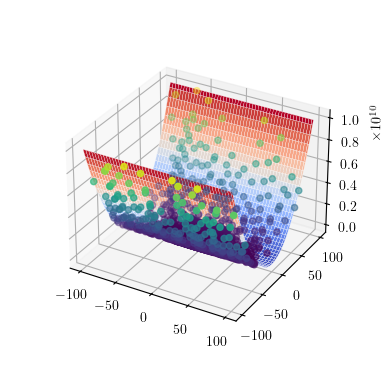

In [5]:
f = VisualWrapper(Bentcigar())

bounds = f.visual_bounds
n_particles = 150
iter = 300
sigma = 1 / n_particles**2
verbose = False

opt = SBS(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, verbose=verbose)
res = opt.minimize(f)
print(f"Results for {opt}: {res[1]}")
f.visualize()